In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [25]:
train_data = pd.read_csv("output.csv")

In [26]:
print("First few rows of the dataset:")
print(train_data.head())


First few rows of the dataset:
      Timestamp  UltrasonicHead  UltrasonicMid  Latitude  Longitude  \
0  1.713607e+09           120.0           90.0       0.0        0.0   
1  1.713607e+09           120.0           90.0       0.0        0.0   
2  1.713607e+09           120.0           90.0       0.0        0.0   
3  1.713607e+09           120.0           90.0       0.0        0.0   
4  1.713607e+09           120.0           90.0       0.0        0.0   

       GyroX      GyroY      GyroZ  IRFront  IRBack  IsHeadObstacle  \
0 -84.678778  -9.962582  84.759243    False   False               0   
1 -85.390669  -9.954434  85.460206    False   False               0   
2 -84.988568  -8.919813  85.049327    False   False               0   
3 -84.720020 -10.229502  84.804182    False   False               0   
4 -85.069365 -10.125383  85.146344    False   False               0   

   IsMidObstacle  IsStaircase  
0              0            0  
1              0            0  
2              0   

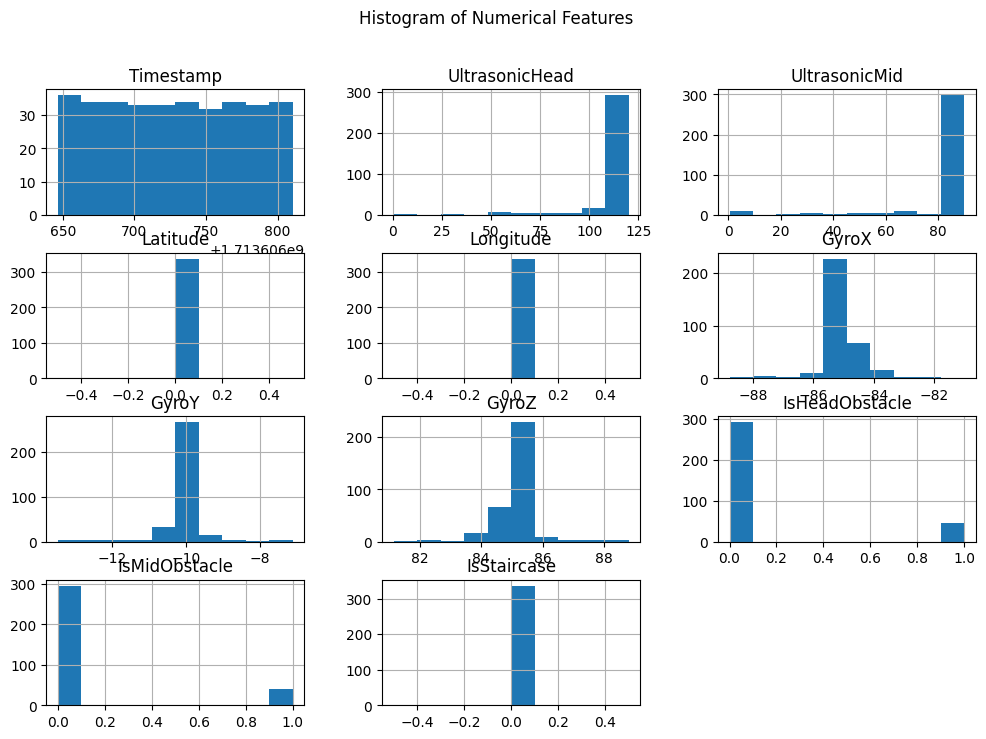

In [27]:
train_data.hist(figsize=(12, 8))
plt.suptitle("Histogram of Numerical Features")
plt.show()

In [49]:
columns_to_keep = ["Timestamp","UltrasonicMid"]
train_data = train_data[columns_to_keep]

print(train_data)

                        Timestamp  UltrasonicMid
0   2024-04-20 09:50:46.541817427           90.0
1   2024-04-20 09:50:46.915802956           90.0
2   2024-04-20 09:50:47.540723801           90.0
3   2024-04-20 09:50:47.915818691           90.0
4   2024-04-20 09:50:48.541097641           90.0
..                            ...            ...
332 2024-04-20 09:53:28.672350407           90.0
333 2024-04-20 09:53:28.925316095           90.0
334 2024-04-20 09:53:29.545791626           90.0
335 2024-04-20 09:53:29.922718287           90.0
336 2024-04-20 09:53:30.547512293           90.0

[337 rows x 2 columns]


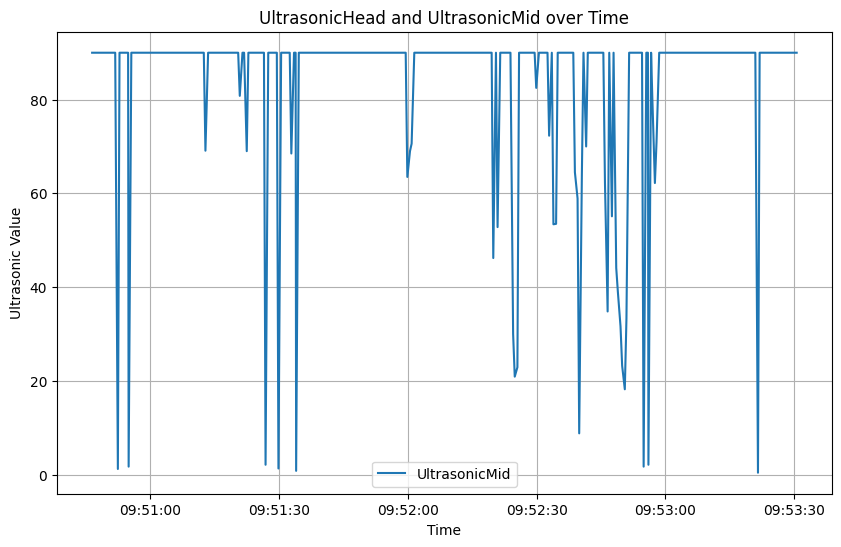

In [50]:
plt.figure(figsize=(10, 6))
#plt.plot(train_data['Timestamp'], train_data['UltrasonicHead'], label='UltrasonicHead')
plt.plot(train_data['Timestamp'], train_data['UltrasonicMid'], label='UltrasonicMid')
plt.xlabel('Time')
plt.ylabel('Ultrasonic Value')
plt.title('UltrasonicHead and UltrasonicMid over Time')
plt.legend()
plt.grid(True)
plt.show()

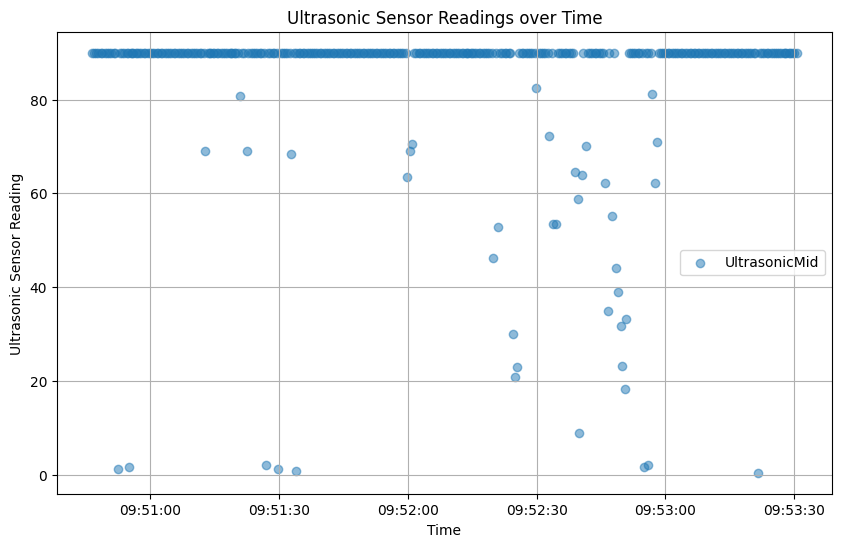

In [51]:
# Convert Timestamp to datetime
train_data['Timestamp'] = pd.to_datetime(train_data['Timestamp'], unit='s')

# Plot UltrasonicHead and UltrasonicMid against Timestamp
plt.figure(figsize=(10, 6))

#plt.scatter(train_data['Timestamp'], train_data['UltrasonicHead'], label='UltrasonicHead', alpha=0.5)
plt.scatter(train_data['Timestamp'], train_data['UltrasonicMid'], label='UltrasonicMid', alpha=0.5)

plt.xlabel('Time')
plt.ylabel('Ultrasonic Sensor Reading')
plt.title('Ultrasonic Sensor Readings over Time')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
#median_head = train_data['UltrasonicHead'].median()
median_mid = train_data['UltrasonicMid'].median()

#print("Median UltrasonicHead:", median_head)
print("Median UltrasonicMid:", median_mid)

Median UltrasonicMid: 90.0


In [53]:
# Calculate max and min values
#max_head = train_data['UltrasonicHead'].max()
#min_head = train_data['UltrasonicHead'].min()

max_mid = train_data['UltrasonicMid'].max()
min_mid = train_data['UltrasonicMid'].min()

#print("Max UltrasonicHead:", max_head)
#print("Min UltrasonicHead:", min_head)
print("Max UltrasonicMid:", max_mid)
print("Min UltrasonicMid:", min_mid)


Max UltrasonicMid: 90.0
Min UltrasonicMid: 0.4


In [54]:
import numpy as np

# Calculate Z-scores for UltrasonicHead and UltrasonicMid columns
#z_scores_head = np.abs((train_data['UltrasonicHead'] - train_data['UltrasonicHead'].mean()) / train_data['UltrasonicHead'].std())
z_scores_mid = np.abs((train_data['UltrasonicMid'] - train_data['UltrasonicMid'].mean()) / train_data['UltrasonicMid'].std())

# Define threshold (for example, 3 standard deviations)
threshold = 3

# Identify outliers
#outliers_head = train_data[z_scores_head > threshold]
outliers_mid = train_data[z_scores_mid > threshold]

#print("Outliers in UltrasonicHead:")
#print(outliers_head)

print("\nOutliers in UltrasonicMid:")
print(outliers_mid)



Outliers in UltrasonicMid:
                        Timestamp  UltrasonicMid
12  2024-04-20 09:50:52.532565594            1.2
18  2024-04-20 09:50:55.041058064            1.7
85  2024-04-20 09:51:26.913897753            2.1
91  2024-04-20 09:51:29.913625240            1.3
100 2024-04-20 09:51:34.030480862            0.8
203 2024-04-20 09:52:24.919983625           20.9
204 2024-04-20 09:52:25.538916826           22.9
233 2024-04-20 09:52:39.922403097            8.8
253 2024-04-20 09:52:49.922421217           23.2
254 2024-04-20 09:52:50.541009665           18.2
263 2024-04-20 09:52:54.922703266            1.7
266 2024-04-20 09:52:56.037930489            2.1
317 2024-04-20 09:53:21.538871527            0.4


In [38]:
# Feature Engineering: Calculate sequential changes in ultrasonic readings
#train_data['UltrasonicHead_diff'] = train_data['UltrasonicHead'].diff()
train_data['UltrasonicMid_diff'] = train_data['UltrasonicMid'].diff()

# Labeling Anomalies: Define anomalies based on criteria (e.g., sequential change threshold)
#threshold_head = 0  # Change this threshold as needed
threshold_mid = 0   # Change this threshold as needed
#train_data['AnomalyHead'] = train_data['UltrasonicHead_diff'].abs() > threshold_head
train_data['AnomalyMid'] = train_data['UltrasonicMid_diff'].abs() > threshold_mid

# Prepare features and labels
X = train_data[[ 'UltrasonicMid_diff']]
#y_head = train_data['AnomalyHead']
y_mid = train_data['AnomalyMid']

# Split data into training and testing sets
X_train, X_test, y_train_mid, y_test_mid = train_test_split(X, y_head, y_mid, test_size=0.2, random_state=42)



In [55]:
# Model Training and Evaluation: Random Forest for UltrasonicMid sensor
rf_classifier_mid = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_mid.fit(X_train, y_train_mid)
y_pred_mid_rf = rf_classifier_mid.predict(X_test)
print("Random Forest Accuracy (UltrasonicMid):", accuracy_score(y_test_mid, y_pred_mid_rf))
print("Confusion Matrix (UltrasonicMid):\n", confusion_matrix(y_test_mid, y_pred_mid_rf))


Random Forest Accuracy (UltrasonicMid): 1.0
Confusion Matrix (UltrasonicMid):
 [[55  0]
 [ 0 13]]


In [56]:
from sklearn.metrics import roc_auc_score

# Calculate AUC for Random Forest model (UltrasonicMid sensor)
auc_rf_mid = roc_auc_score(y_test_mid, rf_classifier_mid.predict_proba(X_test)[:, 1])
print("AUC for Random Forest (UltrasonicMid):", auc_rf_mid)


AUC for Random Forest (UltrasonicMid): 1.0


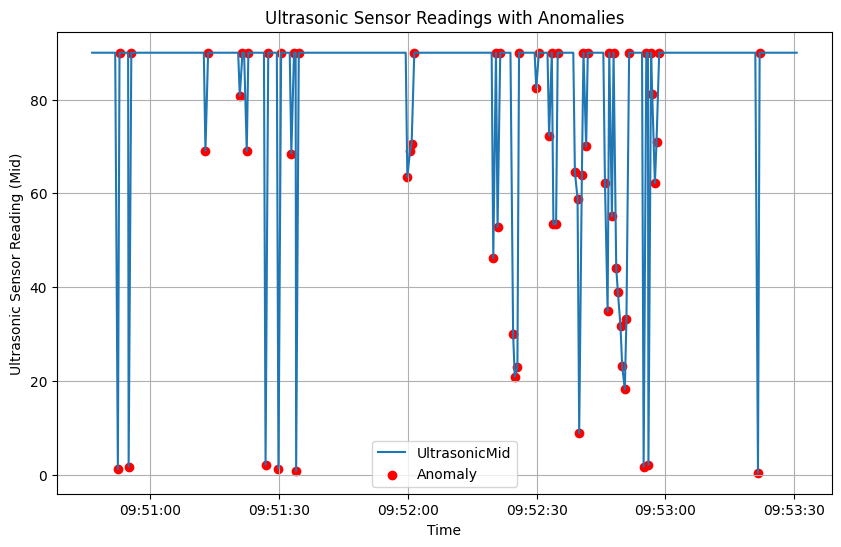

In [60]:
import matplotlib.pyplot as plt

# Plot UltrasonicMid against Timestamp
plt.figure(figsize=(10, 6))
plt.plot(train_data['Timestamp'], train_data['UltrasonicMid'], label='UltrasonicMid')

# Plot anomalies
anomalies = train_data[train_data['AnomalyPrediction']]
plt.scatter(anomalies['Timestamp'], anomalies['UltrasonicMid'], color='red', label='Anomaly')

plt.xlabel('Time')
plt.ylabel('Ultrasonic Sensor Reading (Mid)')
plt.title('Ultrasonic Sensor Readings with Anomalies')
plt.legend()
plt.grid(True)
plt.show()


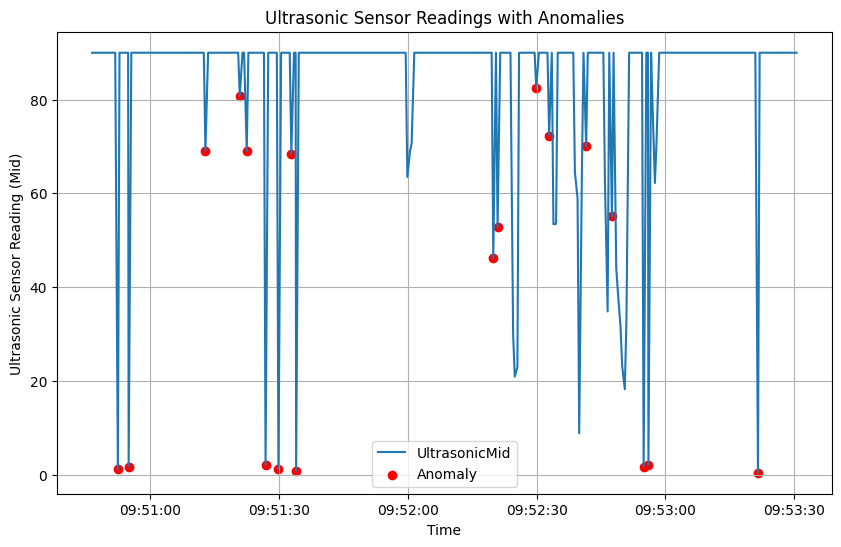

In [61]:
# Initialize list to store anomalies
anomalies = []

# Iterate through the sensor readings
for i in range(1, len(train_data) - 1):
    current_reading = train_data['UltrasonicMid'].iloc[i]
    previous_reading = train_data['UltrasonicMid'].iloc[i - 1]
    next_reading = train_data['UltrasonicMid'].iloc[i + 1]
    
    # Check if current reading is below 90 cm and previous and next readings are 90 cm
    if current_reading < 90 and previous_reading == 90 and next_reading == 90:
        anomalies.append(i)

# Plot UltrasonicMid against Timestamp
plt.figure(figsize=(10, 6))
plt.plot(train_data['Timestamp'], train_data['UltrasonicMid'], label='UltrasonicMid')

# Plot anomalies
plt.scatter(train_data['Timestamp'].iloc[anomalies], train_data['UltrasonicMid'].iloc[anomalies], color='red', label='Anomaly')

plt.xlabel('Time')
plt.ylabel('Ultrasonic Sensor Reading (Mid)')
plt.title('Ultrasonic Sensor Readings with Anomalies')
plt.legend()
plt.grid(True)
plt.show()


In [66]:
import pandas as pd

# Select rows corresponding to anomalies
anomaly_data = train_data.iloc[anomalies].copy()

# Add column for anomalies
anomaly_data['Anomaly'] = True

# Create a DataFrame for non-anomalies
non_anomaly_data = train_data[~train_data.index.isin(anomalies)].copy()
non_anomaly_data['Anomaly'] = False

# Concatenate anomaly and non-anomaly DataFrames
final_data = pd.concat([anomaly_data, non_anomaly_data])

# Convert timestamp to datetime
final_data['Timestamp'] = pd.to_datetime(final_data['Timestamp'], unit='s')

# Sort DataFrame by timestamp
final_data.sort_values(by='Timestamp', inplace=True)

# Write DataFrame to CSV with required columns
final_data[['Timestamp', 'UltrasonicMid', 'Anomaly']].to_csv("anomaly_data.csv", index=False)
